In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

**LOADING THE DATASET**

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

**INSPECTING THE DATA**

In [3]:
print(movies.head())
print(ratings.head())
print(tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferre

**HANDLING THE MISSING VALUES**

In [4]:
print("Missing values in movies:\n", movies.isnull().sum())
print("Missing values in ratings:\n", ratings.isnull().sum())
print("Missing values in tags:\n", tags.isnull().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Missing values in tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


**HANDLING DUPLICATE RECORDS**

In [5]:
print("Duplicates in ratings: ", ratings.duplicated().sum())
print("Duplicates in tags: ", tags.duplicated().sum())

Duplicates in ratings:  0
Duplicates in tags:  0


**DETECTING AND TREATING OUTLIERS**

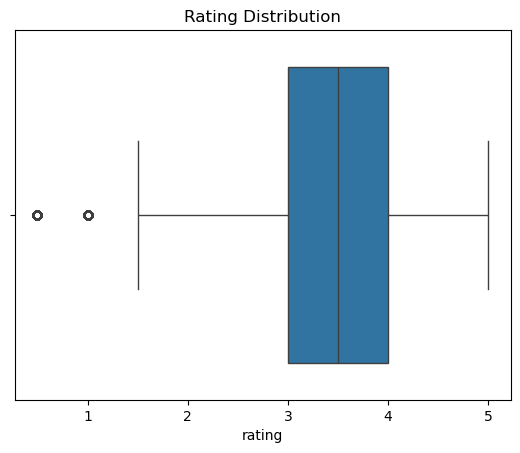

In [6]:
sns.boxplot(x = ratings['rating'])
plt.title('Rating Distribution')
plt.show()

**CONVERTING DATA TYPES AND ENSURING CONSISTENCY**

In [7]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit = 's')

In [8]:
print(ratings['timestamp'])
print(tags['timestamp'])

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]
0      2015-10-24 19:29:54
1      2015-10-24 19:29:56
2      2015-10-24 19:29:52
3      2015-10-24 19:33:27
4      2015-10-24 19:33:20
               ...        
3678   2007-02-11 22:46:59
3679   2007-03-08 22:18:54
3680   2017-05-03 20:39:44
3681   2017-05-03 20:39:38
3682   2017-05-03 20:44:30
Name: timestamp, Length: 3683, dtype: datetime64[ns]


**ENCODING CATEGORICAL VARIABLES**

In [9]:
# Split genres into lists
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Create one-hot encoding for genres
all_genres = sorted(list({genre for sublist in movies['genres'] for genre in sublist}))
for genre in all_genres:
    movies[genre] = movies['genres'].apply(lambda x: int(genre in x))

In [10]:
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  (no genres listed)  \
0     [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                        [Adventure, Children, Fantasy]                   0   
2                                     [Com

**NORMALIZING AND STANDARDIZING FEATURES**

In [11]:
#count ratings per movie
movie_rating_counts = ratings.groupby('movieId').size().reset_index(name = 'rating_count')

#Normalizing rating counts
scaler = MinMaxScaler()
movie_rating_counts['rating_count_normalized'] = scaler.fit_transform(movie_rating_counts[['rating_count']])

In [12]:
print(movie_rating_counts)

      movieId  rating_count  rating_count_normalized
0           1           215                 0.652439
1           2           110                 0.332317
2           3            52                 0.155488
3           4             7                 0.018293
4           5            49                 0.146341
...       ...           ...                      ...
9719   193581             1                 0.000000
9720   193583             1                 0.000000
9721   193585             1                 0.000000
9722   193587             1                 0.000000
9723   193609             1                 0.000000

[9724 rows x 3 columns]


**MERGING DATASETS**

In [13]:
movies = movies.merge(movie_rating_counts, on='movieId', how='left')
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId', how='left')

In [14]:
print(movies)
print(ratings)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  (no genres listed)  \
0     [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                        [Adventure, Children, Fantasy]                   0   
2                                     [Com

**UNIVARIATE ANALYSIS**

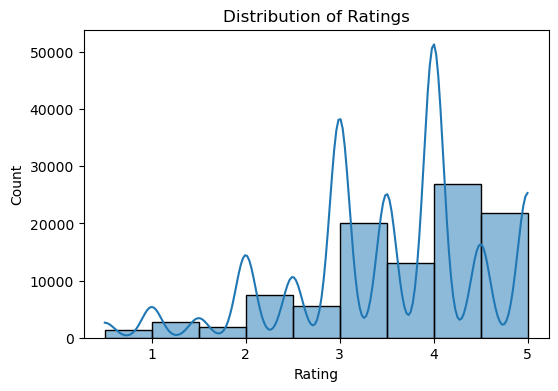

In [15]:
#distribution of ratings
plt.figure(figsize=(6,4))
sns.histplot(data=ratings, x='rating', bins=9, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


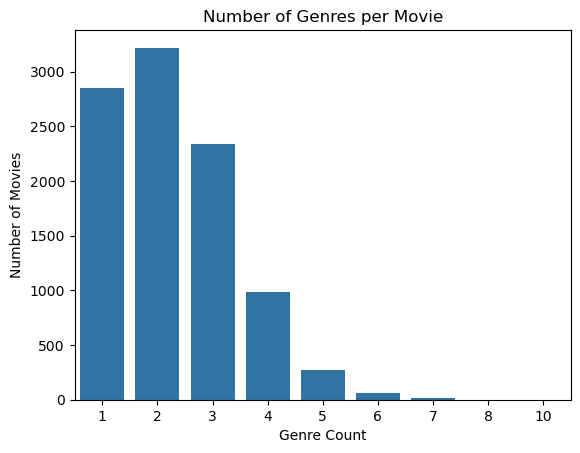

In [16]:
# Count of movies by number of genres
movies['genre_count'] = movies['genres'].apply(lambda x: len(x))
sns.countplot(x='genre_count', data=movies)
plt.title('Number of Genres per Movie')
plt.xlabel('Genre Count')
plt.ylabel('Number of Movies')
plt.show()

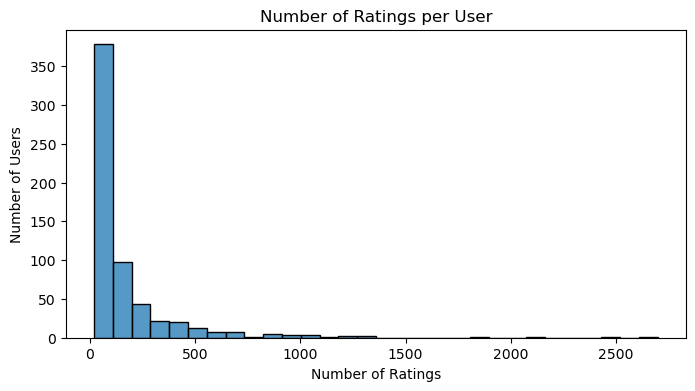

In [17]:
##Number of Ratings Per User
user_rating_count = ratings['userId'].value_counts()

plt.figure(figsize=(8,4))
sns.histplot(user_rating_count, bins=30, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


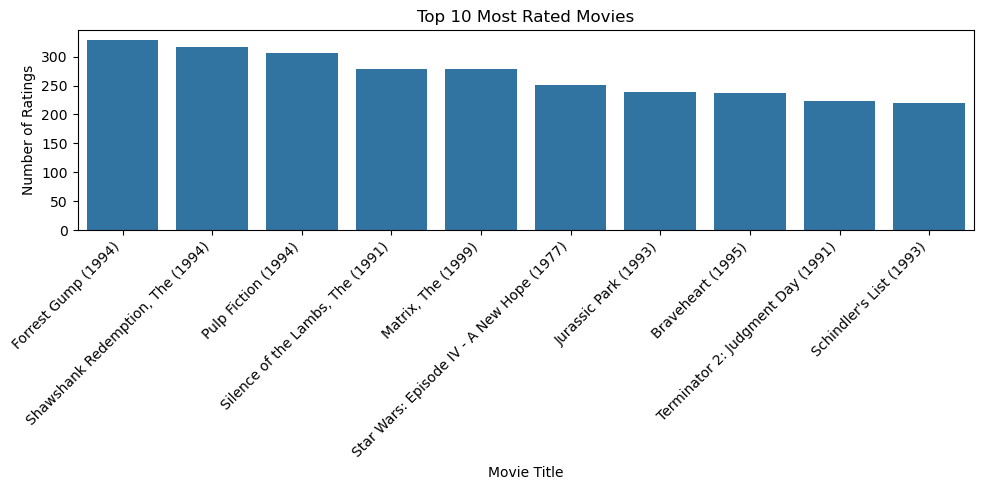

In [18]:
##Top 10 Most Rated Movies
top_movies = ratings['movieId'].value_counts().head(10)
top_movie_titles = movies[movies['movieId'].isin(top_movies.index)]

top_movies_df = top_movie_titles.set_index('movieId').loc[top_movies.index]
top_movies_df['rating_count'] = top_movies.values

plt.figure(figsize=(10,5))
sns.barplot(x=top_movies_df['title'], y=top_movies_df['rating_count'])
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**BIVARIATE ANALYSIS**

C:\Users\Gokul\AppData\Local\Temp\ipykernel_6836\4210069695.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')


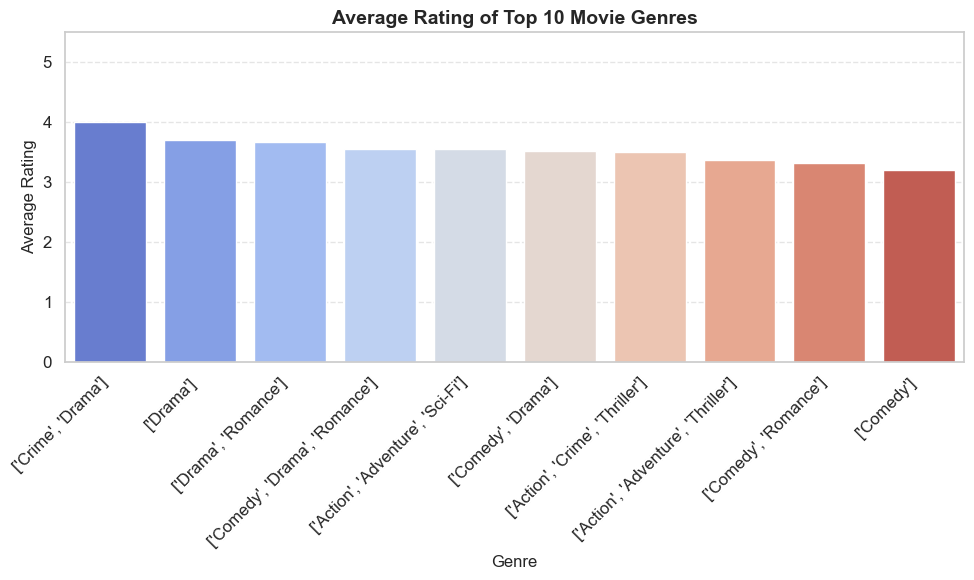

In [19]:
# Clean genres and explode
movies_clean = movies[movies['genres'].notna()].copy()
movies_clean['genres'] = movies_clean['genres'].astype(str).str.split('|')
movies_exploded = movies_clean.explode('genres')

# Remove "(no genres listed)"
movies_exploded = movies_exploded[movies_exploded['genres'] != '(no genres listed)']

# Merge with ratings
genre_ratings = pd.merge(ratings, movies_exploded[['movieId', 'genres']], on='movieId')

# Get top 10 genres by rating count
top_genres = genre_ratings['genres'].value_counts().nlargest(10).index
filtered = genre_ratings[genre_ratings['genres'].isin(top_genres)]

# Calculate average rating per genre
avg_rating = filtered.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Plot bar graph
plt.figure(figsize=(10,6))
sns.set(style='whitegrid', font_scale=1.1)
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')

plt.title('Average Rating of Top 10 Movie Genres', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

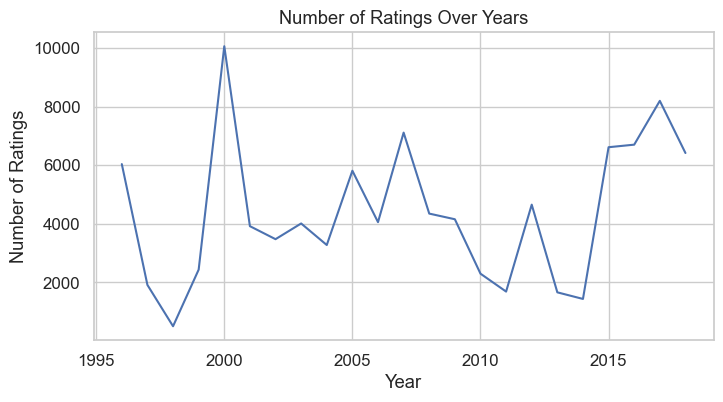

In [20]:
#Time-Based Ratings Trend
#Convert timestamp to datetime and visualize trends over time.
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year

ratings_per_year = ratings.groupby('year')['rating'].count()

plt.figure(figsize=(8,4))
ratings_per_year.plot()
plt.title('Number of Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()


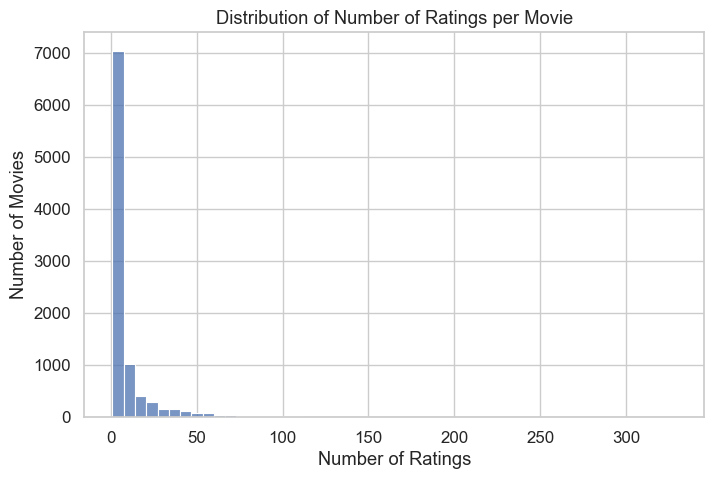

In [21]:
#Number of Ratings per Movie
movie_rating_count = ratings.groupby('movieId')['rating'].count()
plt.figure(figsize=(8,5))
sns.histplot(movie_rating_count, bins=50, kde=False)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()


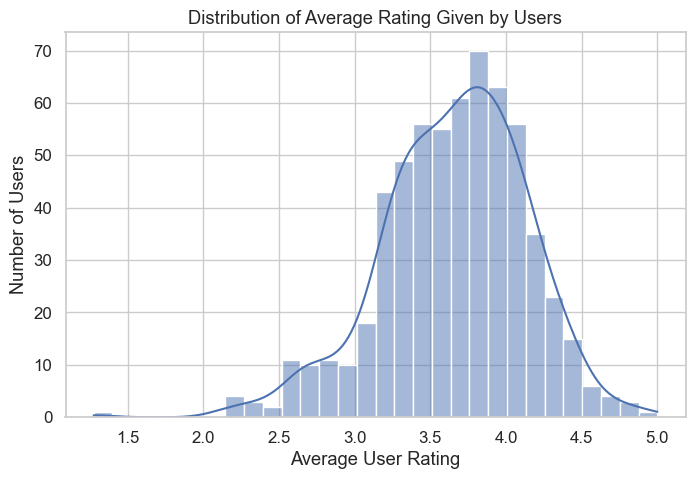

In [22]:
#Rating Distribution Per User
user_avg_rating = ratings.groupby('userId')['rating'].mean()
plt.figure(figsize=(8,5))
sns.histplot(user_avg_rating, bins=30, kde=True)
plt.title('Distribution of Average Rating Given by Users')
plt.xlabel('Average User Rating')
plt.ylabel('Number of Users')
plt.show()


**FEATURE ENGINEERING**

**EXTRACTING DATE COMPONENTS FROM TIMESTAMPS**

In [23]:
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
ratings['days_of_week'] = ratings['timestamp'].dt.dayofweek

In [24]:
print(ratings)

        userId  movieId  rating           timestamp  \
0            1        1     4.0 2000-07-30 18:45:03   
1            1        3     4.0 2000-07-30 18:20:47   
2            1        6     4.0 2000-07-30 18:37:04   
3            1       47     5.0 2000-07-30 19:03:35   
4            1       50     5.0 2000-07-30 18:48:51   
...        ...      ...     ...                 ...   
100831     610   166534     4.0 2017-05-03 21:53:22   
100832     610   168248     5.0 2017-05-03 22:21:31   
100833     610   168250     5.0 2017-05-08 19:50:47   
100834     610   168252     5.0 2017-05-03 21:19:12   
100835     610   170875     3.0 2017-05-03 21:20:15   

                                 title            datetime  year  month  \
0                     Toy Story (1995) 2000-07-30 18:45:03  2000      7   
1              Grumpier Old Men (1995) 2000-07-30 18:20:47  2000      7   
2                          Heat (1995) 2000-07-30 18:37:04  2000      7   
3          Seven (a.k.a. Se7en) (1995) 

**RATING FREQUENCY**

In [25]:
#Ratings per user
user_rating_counts = ratings.groupby('userId').size().reset_index(name = 'user_rating_count')
ratings = ratings.merge(user_rating_counts, on = 'userId', how = 'left')

#Ratings per movie
movie_rating_counts = ratings.groupby('movieId').size().reset_index(name = 'movie_rating_count')
ratings = ratings.merge(movie_rating_counts, on = 'movieId', how = 'left')

print(ratings)

        userId  movieId  rating           timestamp  \
0            1        1     4.0 2000-07-30 18:45:03   
1            1        3     4.0 2000-07-30 18:20:47   
2            1        6     4.0 2000-07-30 18:37:04   
3            1       47     5.0 2000-07-30 19:03:35   
4            1       50     5.0 2000-07-30 18:48:51   
...        ...      ...     ...                 ...   
100831     610   166534     4.0 2017-05-03 21:53:22   
100832     610   168248     5.0 2017-05-03 22:21:31   
100833     610   168250     5.0 2017-05-08 19:50:47   
100834     610   168252     5.0 2017-05-03 21:19:12   
100835     610   170875     3.0 2017-05-03 21:20:15   

                                 title            datetime  year  month  \
0                     Toy Story (1995) 2000-07-30 18:45:03  2000      7   
1              Grumpier Old Men (1995) 2000-07-30 18:20:47  2000      7   
2                          Heat (1995) 2000-07-30 18:37:04  2000      7   
3          Seven (a.k.a. Se7en) (1995) 

**BINNING USER RATING COUNT**

In [26]:
#Bins for users
ratings['user_activity_level'] = pd.cut(ratings['user_rating_count'], bins = [0, 50, 200, np.inf], labels = ['Low', 'Medium', 'High'])

print(ratings)

        userId  movieId  rating           timestamp  \
0            1        1     4.0 2000-07-30 18:45:03   
1            1        3     4.0 2000-07-30 18:20:47   
2            1        6     4.0 2000-07-30 18:37:04   
3            1       47     5.0 2000-07-30 19:03:35   
4            1       50     5.0 2000-07-30 18:48:51   
...        ...      ...     ...                 ...   
100831     610   166534     4.0 2017-05-03 21:53:22   
100832     610   168248     5.0 2017-05-03 22:21:31   
100833     610   168250     5.0 2017-05-08 19:50:47   
100834     610   168252     5.0 2017-05-03 21:19:12   
100835     610   170875     3.0 2017-05-03 21:20:15   

                                 title            datetime  year  month  \
0                     Toy Story (1995) 2000-07-30 18:45:03  2000      7   
1              Grumpier Old Men (1995) 2000-07-30 18:20:47  2000      7   
2                          Heat (1995) 2000-07-30 18:37:04  2000      7   
3          Seven (a.k.a. Se7en) (1995) 

**GENRE COUNT**

In [27]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies['genre_count'] = movies[genre_cols].sum(axis = 1)

print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  (no genres listed)  \
0     [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                        [Adventure, Children, Fantasy]                   0   
2                                     [Com

**TAGS LENGTH**

In [28]:
#Calculating tag length
tags['tag_length'] = tags['tag'].apply(lambda x: len(str(x)))

print(tags)

      userId  movieId               tag           timestamp  tag_length
0          2    60756             funny 2015-10-24 19:29:54           5
1          2    60756   Highly quotable 2015-10-24 19:29:56          15
2          2    60756      will ferrell 2015-10-24 19:29:52          12
3          2    89774      Boxing story 2015-10-24 19:33:27          12
4          2    89774               MMA 2015-10-24 19:33:20           3
...      ...      ...               ...                 ...         ...
3678     606     7382         for katie 2007-02-11 22:46:59           9
3679     606     7936           austere 2007-03-08 22:18:54           7
3680     610     3265            gun fu 2017-05-03 20:39:44           6
3681     610     3265  heroic bloodshed 2017-05-03 20:39:38          16
3682     610   168248  Heroic Bloodshed 2017-05-03 20:44:30          16

[3683 rows x 5 columns]


**DIMENSIONALITY REDUCTION**

In [29]:
#Apply PCA to genre columns
pca = PCA(n_components = 5)
genre_pca = pca.fit_transform(movies[genre_cols])
genre_pca_df = pd.DataFrame(genre_pca, columns = [f'genre_pca{i+1}' for i in range(5)])
movies = pd.concat([movies.reset_index(drop = True), genre_pca_df], axis = 1)

print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                                 genres  (no genres listed)  \
0     [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                        [Adventure, Children, Fantasy]                   0   
2                                     [Com

**SUMMARY OF ALL DATASET**

In [30]:
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,War,Western,rating_count,rating_count_normalized,genre_count,genre_pca1,genre_pca2,genre_pca3,genre_pca4,genre_pca5
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,215.0,0.652439,5,1.072398,-0.318058,0.911843,-0.098554,-0.274141
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,110.0,0.332317,3,0.294662,-0.529721,0.945136,-0.457288,-0.071728
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,52.0,0.155488,2,0.825941,0.434466,-0.200902,0.140583,0.658694
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,7.0,0.018293,3,0.221074,1.004426,-0.014829,0.396487,0.512113
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,49.0,0.146341,1,0.756234,0.118838,-0.240798,-0.039227,-0.218452


In [31]:
ratings.head()

,userId,movieId,rating,timestamp,title,datetime,year,month,days_of_week,user_rating_count,movie_rating_count,user_activity_level
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),2000-07-30 18:45:03,2000,7,6,232,215,High
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),2000-07-30 18:20:47,2000,7,6,232,52,High
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),2000-07-30 18:37:04,2000,7,6,232,102,High
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),2000-07-30 19:03:35,2000,7,6,232,203,High
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",2000-07-30 18:48:51,2000,7,6,232,204,High


**BAYESIAN AVERAGE**

to calculate the popularity of the movies among users

In [32]:
movie_stats = ratings[['movieId' , 'rating']]
print(movie_stats.head())
movie_stats = ratings.groupby('movieId')['rating'].agg(['count' , 'mean'])
print(movie_stats.head())


   movieId  rating
0        1     4.0
1        3     4.0
2        6     4.0
3       47     5.0
4       50     5.0
         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429


**Defining a routine to calculate the bayesian average**

In [33]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie : {C:.2f}")
print(f"Average rating for a given movie : {m:.2f}")

def bay_avg(rating):
    bayesian_avg = (C*m+rating.sum()) / (C + rating.count())
    return round(bayesian_avg , 3)

Average number of ratings for a given movie : 10.37
Average rating for a given movie : 3.26


In [34]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bay_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId' , 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings , on = 'movieId')
movie_stats

,movieId,count,mean,bayesian_avg
0,1,215,3.920930,3.891
1,2,110,3.431818,3.417
2,3,52,3.259615,3.260
3,4,7,2.357143,2.898
4,5,49,3.071429,3.105
...,...,...,...,...
9719,193581,1,4.000000,3.327
9720,193583,1,3.500000,3.283
9721,193585,1,3.500000,3.283
9722,193587,1,3.500000,3.283


**COLLABORATIVE FILTERING**

Defining a sparse matrix to map user with ratings

In [35]:
from scipy.sparse import csr_matrix

def create_X(df):
  """
  Generates a sparse matrix from ratings dataframe.

  Args:
    df: pandas dataframe containing 3 columns (userId , movieId , rating)

  Returns:
    X: Sparse matrix
    user_mapper: dict that maps user id's to user inidices
    user_inv_mappter: dict that maps user indices to user id's
    movie_mapper: dict that maps movie id's to movie indices
    movie_inv_mapper: dict that maps movie indices to movie id's
  """

  M = df['userId'].nunique()
  N = df['movieId'].nunique()

  user_mapper = dict(zip(np.unique(df["userId"]) , list(range(M))))
  movie_mapper = dict(zip(np.unique(df["movieId"]) , list(range(N))))

  user_inv_mapper = dict(zip(list(range(M)) , np.unique(df["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)) , np.unique(df["movieId"])))

  user_index = [user_mapper[i] for i in df['userId']]
  item_index = [movie_mapper[i] for i in df['movieId']]

  X = csr_matrix((df["rating"] , (user_index , item_index)) , shape = (M , N))

  return X , user_mapper , movie_mapper , user_inv_mapper , movie_inv_mapper



In [36]:
X , user_mapper , movie_mapper , user_inv_mapper , movie_inv_mapper = create_X(ratings)

In [37]:
X.shape

(610, 9724)

Evaluating Sparsity

In [38]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity : {round(sparsity*100 , 2)}%")

Matrix sparsity : 1.7%


**Item - Item Recommendations with k-Nearest Neighbors**

In [39]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies_collaborative(movie_id , X , movie_mapper , movie_inv_mapper , k , metric = 'cosine'):
  """
  Finds k-nearest neighbours for a given movie id.

  Args:
    movie_id: id of the movie of interest.
    X: user-item utility matrix.
    k: number of similar movies to retrieve.
    metric: distance metric for kNN calculations

  Output:
    Returns list of k similar movie ID's
  """

  X = X.T
  neighbour_ids = []

  movie_ind = movie_mapper[movie_id]
  movie_vec = X[movie_ind]

  # Ensure movie_vec is in the correct shape
  if isinstance(movie_vec , (np.ndarray)):
    movie_vec = movie_vec.reshape(1 , -1)

  # use k+1 since kNN output includes the movieId of interest
  kNN = NearestNeighbors(n_neighbors = k + 1 , algorithm = "brute" , metric = metric)
  kNN.fit(X)
  neighbour = kNN.kneighbors(movie_vec , return_distance = False)

  for i in range(0 , k):
    n = neighbour.item(i)
    neighbour_ids.append(movie_inv_mapper[n])

  neighbour_ids.pop(0)
  return neighbour_ids

In [40]:
# Testing our model gives output
similar_movies = find_similar_movies_collaborative(1 , X , movie_mapper , movie_inv_mapper , k = 10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

In [41]:
# mapping movieId with their corresponding title

movie_titles = dict(zip(movies['movieId'] , movies['title']))

movie_id = 1

similar_movies = find_similar_movies_collaborative(movie_id , X , movie_mapper , movie_inv_mapper , metric = 'manhattan' , k = 10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
  print(movie_titles[i])

Because you watched Toy Story (1995):
Toy Story 2 (1999)
Bug's Life, A (1998)
Groundhog Day (1993)
Nutty Professor, The (1996)
Willy Wonka & the Chocolate Factory (1971)
Mission: Impossible (1996)
Babe (1995)
Monsters, Inc. (2001)
Toy Story 3 (2010)


**CONTENT-BASED FILTERING**

In [42]:
movies_genres = movies.drop(columns = ['(no genres listed)' , 'movieId' , 'title' , 'genres' , 'rating_count' , 'rating_count_normalized' , 'genre_count' , 'genre_pca1' ,'genre_pca2' , 'genre_pca3' , 'genre_pca4' , 'genre_pca5'])
movies_genres.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movies_genres , movies_genres)
print(f"Dimensions of our genres cosine similarity matrix : {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix : (9742, 9742)


Before further proceeding the content based filtering, let's deal with the issues when we gave the name of the movie with misspelled

So, let's define a function which gives the correct title name , even if we gave wrong name

In [44]:

from fuzzywuzzy import process

def movie_finder(title):
  all_titles = movies['title'].tolist()
  closest_match = process.extractOne(title , all_titles)
  return closest_match[0]

c:\Users\Gokul\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def find_similar_movie_content_based(movie_title , n_recommendations):
    title = movie_finder(movie_title)

    movie_idx = dict(zip(movies['title'] , list(movies.index)))
    idx = movie_idx[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores , key = lambda x : x[1] , reverse = True)
    sim_scores = sim_scores[1 : (n_recommendations + 1)]
    similar_movies = [i[0] for i in sim_scores]

    result = movies['title'].iloc[similar_movies]
    return result

In [46]:
content_based = find_similar_movie_content_based('juminji' , 10)
content_based

53                     Indian in the Cupboard, The (1995)
109                     NeverEnding Story III, The (1994)
767                       Escape to Witch Mountain (1975)
1514            Darby O'Gill and the Little People (1959)
1556                                  Return to Oz (1985)
1617                        NeverEnding Story, The (1984)
1618    NeverEnding Story II: The Next Chapter, The (1...
1799                        Santa Claus: The Movie (1985)
3574    Harry Potter and the Sorcerer's Stone (a.k.a. ...
6075    Chronicles of Narnia: The Lion, the Witch and ...
Name: title, dtype: object

**COMBINING TMDB AND MOVIE TITLES**

In [67]:
link_dataset = pd.read_csv("links.csv");
link_dataset.head()



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [106]:
def index_to_tmdb(index):
    match = link_dataset[link_dataset['movieId'] == index]['tmdbId']
    if not match.empty:
        return int(match.iloc[0])
    else:
        return None 



In [107]:
print(index_to_tmdb(2))

8844


In [108]:
def tmdb_list_collaborative(title_list):
    tmdb_list = []
    for i in range(0 , len(title_list)):
        tmdb_list.append(index_to_tmdb(title_list[i]))
    return tmdb_list


In [109]:
tmdb_list_collaborative(similar_movies)

[863, 9487, 137, 9327, 252, 954, 9598, 585, 10193]

pandas.core.series.Series